# CONFIGURACIONES INICIALES

Python

- Verificar que tenemos instalado python en nuestro sistema operativo

Creamos Entorno virtual

- En linux ejecutar: python3 -m venv venv
- En windows ejecutar: py -m venv venv

Activamos entorno virtual

- En linux ejecutar:source venv/bin/activate
- En windows ejecutar: .\venv\script\activate

Instalamos dependencias

- pip install numpy
- pip install ipython
- pip install ipykernel
- pip install plotly
- pip install matplotlib 
- pip install nbformat
- pip install scipy
- pip install pandas

Pasos finales

- Una vez instalado todo, desactivar el entorno virtual ingresando en la terminal "deactivate"
- Luego volver a activar el entorno virtual.
- crear el kernel para ejecutar los comandos: ipython kernel install --user --name=venv
- reiniciamos el Jupyter Notebook
- Seleccionar el kernel utilizado en el entorno virtual y no el nativo del sistema operativo, desde VSCODE en la zona superior derecha.

# Inicio

Definimos las variables necesarias para ejecutar

In [249]:
############### VARIABLES FIBONACCI #################

# primer parametro es "v1" que es el valor 1, 
v1 = 23

# para provocar falso
# v1 = 1

# segundo parametro "v2" que es el valor 2,
v2 = 67

# para provocar falso
# v2 = 4

# tercer parametro es "K" y que es requerido por la funcion para "(v1 + v2) <= K"
K_Fibonacci = 177

############### VARIABLES CONGRUENCIA FUNDAMENTAL #################

# primer parametro es "a" que multiplica a Vi, 
a = 2

# segundo parametro "c" que multiplica a Vi-k, 
c = 6

# para provocar falso
# c = 4 # Falso test de Poker
# c = 3 # Falso test de Chi

# tercer parametro es "K" que es la cantidad de espacios a crear antes de los nros aleatorios
K_Congruencias = 16

# cuarto parametro es "m" que es el tope de numeros a generar
m = 825

# Minimo y Maximo (para utilizar congruencia fundamental entre un rango de valores)

minimo = 540

maximo = 860

############### VARIABLES GENERALES #################

# En Fibonacci y Congruencias el parametro "n" es la cantidad de numeros que queremos generar
n = 1000

# Definimos la confianza para aplicar en los TEST's de Poker y Ji Cuadrada
confianza = 0.6

Importamos las librerias necesarias para ejecutar el codigo

In [250]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat
from scipy.stats import chi2, chisquare
import math

Definimos la funcion y generamos los numeros aleatorios de Fibonacci y a partir de ahi definimos y generamos los numeros pseudoaleatorios mediante la congruencia fundamental. Estos numeros pseudoaletorios son generados entre los rangos establecidos en las variables

In [251]:
def fibonacci(v1,v2,K,n):
    if v1 < 0:
        print('Valor inválido v1, tiene que ser mayor que CERO')
    elif v2 < 0:
        print('Valor inválido de v2, tiene que ser mayor que CERO')
    elif v2 < v1:
        print('Valor inválido, v2 es menor que v1')
    elif K < 0:
        print('Valor inválido de K para Fibonacci, tiene que ser mayor que CERO')
    else:
        list = []
        list.append(v1)
        list.append(v2)
        for i in range(n):
            if (v1 + v2) <= K:
                total = v1 + v2 + (0 * K)
            else:    
                total = v1 + v2 + (-1 * K)
                
            # Reasignamos las variables
            
            v1 = v2
            v2 = total
            
            # Agregamos el numero nuevo
            
            list.append(total)

        # Retornamos el listado de numeros aleatorios concatenados 
        
        return(list)
    
# Generamos el listado de numeros aleatorios aplicando Fibonacci

numeros_fibonacci = fibonacci(v1,v2,K_Fibonacci,n)

# Imprimimos el array de fibonacci

print('Listado de numeros aleatorios aplicando Fibonacci:')
print('')
print(numeros_fibonacci)

def congruencia_fundamental(a,c,K_Congruencias,m,n, minimo, maximo):
    if a <= 0:
        print('Valor inválido de A, tiene que ser mayor que CERO')
    elif c <= 0:
        print('Valor inválido de C, tiene que ser mayor que CERO')
    elif m <= 0:
        print('Valor inválido de M, tiene que ser mayor que CERO')    
    elif m < a:
        print('Valor inválido, M debe ser mayor que A')
    elif K_Congruencias < 0:
        print('Valor invalido de K para congruencias, tiene que ser mayor que CERO')
    elif maximo < minimo:
        print('Valor invalido de MAXIMO, tiene que ser mayor que MINIMO')
    else:
         # Creamos un Array auxiliar de K para el método con la secuencia Fibonacci
        aux = numeros_fibonacci
                       
        # Ejecutamos el metodo de congruencia fundamental
        list = []
        for i in range(n):
            
            # Transformar el número generado a un número en el rango [minimo, maximo]
            
            # numero_aleatorio = minimo + ((a * aux[i-1] + c * aux[i-K_Congruencias]) % (maximo - minimo + 1))

            nro = ((a * aux[i-1] + c * aux[i-K_Congruencias]) % m)
            numero_aleatorio = minimo + nro % (maximo - minimo + 1)
                        
            list.append(numero_aleatorio)

        # Retornamos el listado de numeros aleatorios
        return(list)
    
# Generamos el listado de numeros aleatorios aplicando Congruencia Fundamental con valores de minimo y maximo

numeros_congruencia = congruencia_fundamental(a,c,K_Congruencias,m,n,minimo,maximo)
print('')
print('Listado de numeros aleatorios aplicando Congruencia Fundamental entre el rango de valores establecido:')
print('')
print(numeros_congruencia)

Listado de numeros aleatorios aplicando Fibonacci:

[23, 67, 90, 157, 70, 50, 120, 170, 113, 106, 42, 148, 13, 161, 174, 158, 155, 136, 114, 73, 10, 83, 93, 176, 92, 91, 6, 97, 103, 23, 126, 149, 98, 70, 168, 61, 52, 113, 165, 101, 89, 13, 102, 115, 40, 155, 18, 173, 14, 10, 24, 34, 58, 92, 150, 65, 38, 103, 141, 67, 31, 98, 129, 50, 2, 52, 54, 106, 160, 89, 72, 161, 56, 40, 96, 136, 55, 14, 69, 83, 152, 58, 33, 91, 124, 38, 162, 23, 8, 31, 39, 70, 109, 2, 111, 113, 47, 160, 30, 13, 43, 56, 99, 155, 77, 55, 132, 10, 142, 152, 117, 92, 32, 124, 156, 103, 82, 8, 90, 98, 11, 109, 120, 52, 172, 47, 42, 89, 131, 43, 174, 40, 37, 77, 114, 14, 128, 142, 93, 58, 151, 32, 6, 38, 44, 82, 126, 31, 157, 11, 168, 2, 170, 172, 165, 160, 148, 131, 102, 56, 158, 37, 18, 55, 73, 128, 24, 152, 176, 151, 150, 124, 97, 44, 141, 8, 149, 157, 129, 109, 61, 170, 54, 47, 101, 148, 72, 43, 115, 158, 96, 77, 173, 73, 69, 142, 34, 176, 33, 32, 65, 97, 162, 82, 67, 149, 39, 11, 50, 61, 111, 172, 106, 101, 30, 131

Definimos y realizamos los Test's de Poker y Chi Cuadrado sobre los numeros aleatorios aplicando el rango de valores mínimos y maximos y generamos los mismos

In [252]:
def test_poker(nros, minimo, maximo):
   
    a = 0
    i = 0
    grupos = []
    tipos = [0, 0, 0, 0, 0, 0, 0]
    cant_grupos = len(nros) // 5

    # Agrupamos de a 5 elementos
    while a < cant_grupos:
        grupo = []
        for j in range(5):
            grupo.append((nros[i] - minimo) / (maximo - minimo))
            i += 1
        grupos.append(grupo)
        a += 1

    # Clasificamos los grupos (obtener frecuencia observada)
    for item in grupos:
        apariciones = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        valor = 1

        for i in range(10):
            apariciones[i] += item.count(i)

        for i in range(10):
            if apariciones[i] > 0:
                valor = valor * apariciones[i]

        if valor == 1:
            tipos[0] += 1
        elif valor == 2:
            tipos[1] += 1
        elif valor == 3:
            tipos[3] += 1
        elif valor == 4:
            if 4 in apariciones:
                tipos[5] += 1
            else:
                tipos[2] += 1
        elif valor == 5:
            tipos[6] += 1
        elif valor == 6:
            tipos[4] += 1
        else:
            return "error"

    # Calculo de fe
    fe = [0, 0, 0, 0, 0, 0, 0]
    fe[0] = cant_grupos * 0.3024
    fe[1] = cant_grupos * 0.504
    fe[2] = cant_grupos * 0.108
    fe[3] = cant_grupos * 0.072
    fe[4] = cant_grupos * 0.009
    fe[5] = cant_grupos * 0.0045
    fe[6] = cant_grupos * 0.0001

    # Calculo de x0
    x0 = 0
    for i in range(7):
        x0 += ((fe[i] - tipos[i]) ** 2) / fe[i]

    return x0

def res_test_poker(resultado, confianza):
    
    grados_libertad = len(numeros_congruencia) - 1

    valor_chi2 = chi2.ppf(confianza, grados_libertad)
        
    if valor_chi2 > resultado:
        print(f"{resultado} < {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO")
    else:
        print(f"{resultado} > {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es FALSO")
        
# Se genera la impresion de los resultados en la funcion

resultado = test_poker(numeros_congruencia, minimo, maximo)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_poker(resultado, confianza)


def test_jicuadrado(nros):
    x0 = 0
    fi = [0] * (max(nros) - min(nros) + 1)

    # Cálculo de fi
    for item in nros:
        fi[item - min(nros)] += 1

    # Cálculo de npi
    npi = len(nros) / len(fi)

    # Cálculo de x0
    for i in range(len(fi)):
        x0 += ((fi[i] - npi) ** 2) / npi

    return x0

def res_test_chi(resultado, confianza): 

    grados_libertad = len(numeros_congruencia) - 1

    valor_chi2 = chi2.ppf(1 - confianza, grados_libertad)
                
    #Comparamos si el resultado es menor o mayor al correspondiente en la tabla
    
    if (valor_chi2 > resultado ):
        print(f"{resultado} < {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO')
        return
    else:
        print(f"{resultado} > {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es FALSO')
        return
    
# Se genera la impresion de los resultados en la funcion

resultado = test_jicuadrado(numeros_congruencia)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_chi(resultado, confianza)

461.37566137566125 < 1009.6961921031988
El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO
993.1119999999949 > 987.0562079660383
El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es FALSO


Generamos la distribucion de Bernoulli sobre los numeros aleatorios del rango de valores establecido, contabilizamos y graficamos los datos obtenidos.

In [253]:
def distribucion_bernoulli(numeros):
    
    mitad = (maximo + minimo) / 2
    
    valores = np.array(numeros)
    
    binarios = np.where(valores >= mitad, 1, 0)
    
    return binarios

distribucion = distribucion_bernoulli(numeros_congruencia)

print(f'La mitad es {(maximo + minimo) / 2}')

print('')

print(distribucion)

# Usamos plotly para hacer un diagrama de barras interactivo con la distribución de los datos

# Contamos los valores CERO y UNO

datos = {}

for valor in distribucion:
    if valor in datos:
        datos[valor] += 1
    else:
        datos[valor] = 1
        
print(datos.keys())
print(datos.values())
print(datos)

fig = go.Figure(data=[go.Pie(labels=list(datos.keys()), values=list(datos.values()))])
fig.show()

La mitad es 700.0

[0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0

Mediante los datos obtenidos graficamos la distribución normal

la media es: 686.764
la desviación estandar es: 90.04371329526565


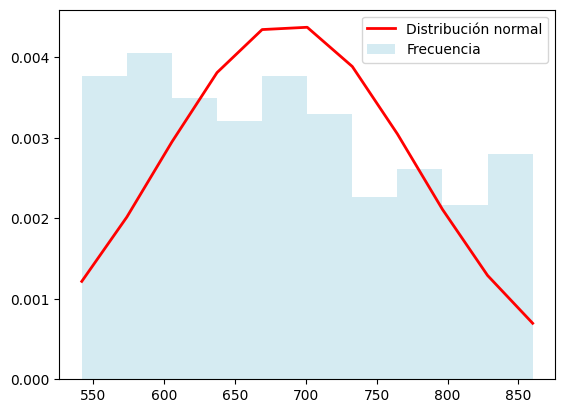

In [254]:
# Utilizamos los numeros aleatorios obtenidos por la congruencia fundamental

datos = np.array(numeros_congruencia)

# Calculamos la media y la desviación estándar

mu = np.mean(datos)

print(f"la media es: {mu}")

sigma = np.std(datos)

print(f"la desviación estandar es: {sigma}")

# Creamos un rango de valores x para la distribución normal

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculamos la distribución normal para los valores x

y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Creamos un histograma de los datos

n, bins, patches = plt.hist(datos, bins=10, density=True, color='lightblue', alpha=0.5)

# Creamos la curva de distribución normal

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='red')

# Configuramos la leyenda

plt.legend(['Distribución normal', 'Frecuencia'])

# Mostramos el gráfico
plt.show()

Definimos y generamos las marcas de clases para generar las variables aleatorias sobre los datos de simulación requeridos

                 piloto  Frecuencia Esperada
0         Diego Aventín             3.333333
1        Mariano Werner            20.000000
2    Luis José Di Palma             6.666667
3          Matías Rossi            10.000000
4     Christian Ledesma             3.333333
5       Facundo Ardusso            13.333333
6         Omar Martínez             3.333333
7     Guillermo Ortelli             3.333333
8      Agustín Canapino            16.666667
9    Jonatan Castellano             3.333333
10   José Manuel Urcera            10.000000
11  Juan Cruz Benvenuti             3.333333
12    Mauricio Lambiris             3.333333


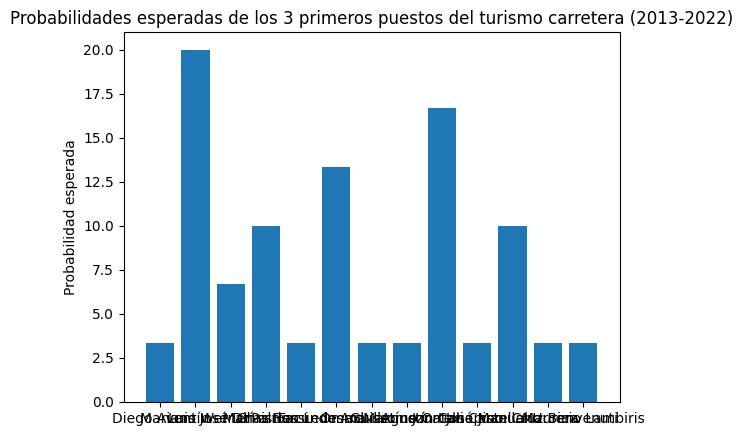

In [255]:
# Listamos los pilotos en podio del turismo carretera desde el 2013 al 2022
pilotos = ["Diego Aventín", "Mariano Werner", "Luis José Di Palma", #2013
           "Matías Rossi", "Christian Ledesma", "Facundo Ardusso", #2014
           "Omar Martínez", "Matías Rossi", "Facundo Ardusso", #2015
           "Guillermo Ortelli", "Matías Rossi", "Mariano Werner", #2016
           "Agustín Canapino", "Facundo Ardusso", "Luis José Di Palma", #2017
           "Agustín Canapino", "Jonatan Castellano", "Facundo Ardusso", #2018
           "Agustín Canapino", "José Manuel Urcera", "Mariano Werner", #2019
           "Mariano Werner", "Juan Cruz Benvenuti", "José Manuel Urcera", #2020
           "Mariano Werner", "Mauricio Lambiris", "Agustín Canapino", #2021
           "José Manuel Urcera", "Mariano Werner", "Agustín Canapino"] #2022


# Contamos la cantidad de veces que cada piloto ha obtenido un lugar entre los tres primeros puestos
pilotos_final = {}
conteo = {}
for piloto in pilotos:
    if piloto in conteo:
        conteo[piloto] += 1
    else:
        conteo[piloto] = 1

for piloto in pilotos:
    if piloto in conteo:
        #print(piloto, conteo[piloto])
        pilotos_final[piloto] =  conteo[piloto]
        del conteo[piloto]

# Número total de carreras consideradas
num_carreras = 30  # 10 años x 3 posiciones

# Calculamos la probabilidad esperada para cada piloto
prob_pilotos = {}
for piloto, count in pilotos_final.items():
    prob_pilotos[piloto] = (count / num_carreras)*100
        
# Creamos la tabla
tabla = pd.DataFrame({
    "piloto": prob_pilotos.keys(),
    "Frecuencia Esperada": prob_pilotos.values(),
})

# Mostramos la tabla
print(tabla)
    
# Representamos las probabilidades esperadas con un gráfico de barras
plt.bar(prob_pilotos.keys(), prob_pilotos.values())
#plt.xlabel("Pilotos")
plt.ylabel("Probabilidad esperada")
plt.title("Probabilidades esperadas de los 3 primeros puestos del turismo carretera (2013-2022)")
plt.show()

Generamos las marcas de clases para realizar la simulación y realizamos el grafico de las mismas

Clase 1: 33.07692307692308 - 99.23076923076924  Frecuencia observada: 0
Clase 2: 99.23076923076924 - 165.38461538461542  Frecuencia observada: 0
Clase 3: 165.38461538461542 - 231.53846153846158  Frecuencia observada: 0
Clase 4: 231.53846153846155 - 297.69230769230774  Frecuencia observada: 0
Clase 5: 297.69230769230774 - 363.8461538461539  Frecuencia observada: 0
Clase 6: 363.8461538461539 - 430.0000000000001  Frecuencia observada: 0
Clase 7: 430.00000000000006 - 496.1538461538462  Frecuencia observada: 0
Clase 8: 496.1538461538462 - 562.3076923076924  Frecuencia observada: 0
Clase 9: 562.3076923076924 - 628.4615384615386  Frecuencia observada: 184
Clase 10: 628.4615384615386 - 694.6153846153848  Frecuencia observada: 259
Clase 11: 694.6153846153848 - 760.769230769231  Frecuencia observada: 244
Clase 12: 760.7692307692308 - 826.923076923077  Frecuencia observada: 151
Clase 13: 826.923076923077 - 893.0769230769232  Frecuencia observada: 162
Marcas de clase: [554.2307692307693, 578.69230

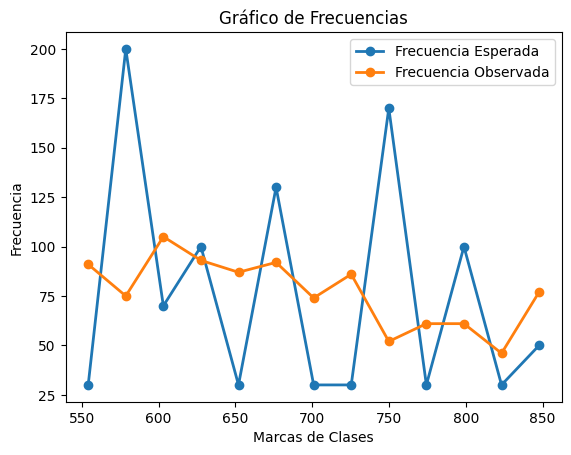

In [256]:
# Definimos el número de clases y la amplitud

num_clases = len(pilotos_final) # Cantidad de pilotos del listado anterior
amplitud_clase = maximo/len(pilotos_final)

# Calculamos las marcas de clase
marcas_clase = [amplitud_clase/2 + i*amplitud_clase for i in range(num_clases)]

# Calcular la frecuencia de cada clase
frecuencia_clase = [0]*num_clases
for num in numeros_congruencia:
    for i in range(num_clases):
        if num >= i*amplitud_clase and num < (i+1)*amplitud_clase:
            frecuencia_clase[i] += 1

# Imprimir los resultados
for i in range(num_clases):
    print(f"Clase {i+1}: {marcas_clase[i]} - {marcas_clase[i]+amplitud_clase}  Frecuencia observada: {frecuencia_clase[i]}")
    

# Dividimos el rango de valores en N intervalos de igual tamaño
num_intervalos = len(pilotos_final) # Cantidad de pilotos del listado anterior
rango = max(numeros_congruencia) - min(numeros_congruencia)
ancho_intervalo = rango / num_intervalos

# Calculamos las marcas de clase y las probabilidades de cada intervalo
marcas_clase = [min(numeros_congruencia) + (i + 0.5) * ancho_intervalo for i in range(num_intervalos)]
probabilidades = [ancho_intervalo / rango] * num_intervalos

# Contamos cuántos números aleatorios caen en cada intervalo
frecuencias_obs = np.histogram(numeros_congruencia, bins=num_intervalos, range=(min(numeros_congruencia), max(numeros_congruencia)))[0]

# Calculamos las frecuencias esperadas
frecuencias_esp = []

cantidad_total = len(numeros_congruencia)
lista_numeros = []

porcentajes_enteros = [round(p) for p in prob_pilotos.values()]
porcentajes_enteros[-1] += 100 - sum(porcentajes_enteros)

for porcentaje in porcentajes_enteros:
    numero = int(porcentaje / 100 * cantidad_total)
    frecuencias_esp.append(numero)

# Calculamos el estadístico de chi-cuadrado y el p-valor
chi2, p = chisquare(frecuencias_obs, frecuencias_esp)

print("Marcas de clase:", marcas_clase)
print("Probabilidades:", probabilidades)
print("Frecuencias observadas:", frecuencias_obs)
print("Frecuencias esperadas:", frecuencias_esp)

# Creamos el gráfico
plt.plot(marcas_clase, frecuencias_esp, '-o', label='Frecuencia Esperada', linewidth=2)
plt.plot(marcas_clase, frecuencias_obs, '-o', label='Frecuencia Observada', linewidth=2)
plt.legend(loc='best')
plt.title('Gráfico de Frecuencias')
plt.xlabel('Marcas de Clases')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()